<a href="https://colab.research.google.com/github/GaneshKannanOfficial/BitcoinPrice_Prediction/blob/main/BitCoin_RandomForest_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [2]:
# Downloading the data
df = yf.download('BTC-USD')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-11-14,36491.789062,36753.351562,34948.500000,35537.640625,35537.640625,23857403554
2023-11-15,35548.113281,37964.894531,35383.781250,37880.582031,37880.582031,27365821679
2023-11-16,37879.980469,37934.625000,35545.472656,36154.769531,36154.769531,26007385366


In [3]:
# Preparing the dataset
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']
row = int(len(x) * 0.9)
x_train = x[:row]
x_test = x[row:]
y_train = y[:row]
y_test = y[row:]

In [6]:
# Create the model
rf = RandomForestRegressor(random_state=0)

# Define the parameters for grid search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['sqrt','log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Grid Search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [8]:
# Best parameters found
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Using the best parameters to create a new model
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(x_train, y_train)

# Predicting the test set results
y_pred = best_rf.predict(x_test)

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


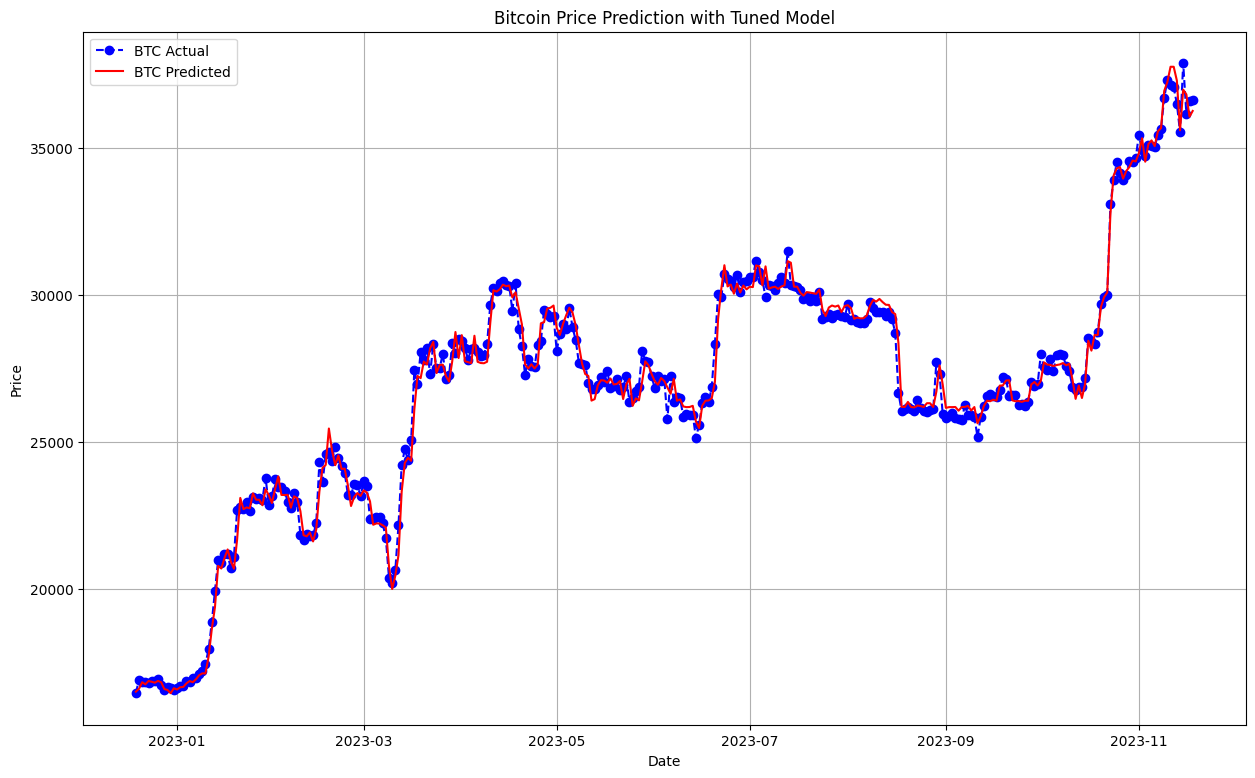

In [9]:
# Plotting the results
plt.figure(figsize=(15, 9))
plt.grid(True)
plt.plot(df.index[row:], y_test, color='b', marker='o', linestyle='dashed', label='BTC Actual')
plt.plot(df.index[row:], y_pred, color='r', label='BTC Predicted')
plt.title('Bitcoin Price Prediction with Tuned Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [11]:
# Evaluating the new model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Displaying metrics
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared (R2)', 'MAPE'],
    'Value': [rmse, mae, r_squared, mape]
})
print(metrics_df)

           Metric       Value
0            RMSE  382.722638
1             MAE  280.959732
2  R-squared (R2)    0.992380
3            MAPE    0.010499
